<div style=" background-color:  rgba(2,1,0,0.7);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 5 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Optimisez la gestion des données d'une boutique avec R ou Python
</h2>
</div>


**Sommaire :**
 1. [Import des librairies et données nécessaires à l'étude ](#1.-Import-des-librairies-et-données-nécessaires-à-l'étude)
 2. [Préparation des données source : observation et nettoyage des Dataframes ](#2.-Préparation-des-données-source-:-observation-et-nettoyage-des-Dataframes)
 3. [Rapprocher les exports ERP et Web via Liaison  ](#3.-Rapprocher-les-exports-ERP-et-Web-via-Liaison)
 4. [Analyse des ventes en lignes ](#3.-Analyse-des-ventes-en-lignes)

# Import des librairies et données nécessaires à l'étude:

In [226]:
# Librairies de calcul
import pandas as pd
import numpy as np

# Librairies de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Import des donnees
liaison = pd.read_csv('liaison.csv')
erp = pd.read_csv('erp.csv')
web = pd.read_csv('web.csv')

# Observation et nettoyage des Dataframes:

## Fichier de liaison:

In [87]:
liaison.shape

(825, 2)

In [4]:
liaison.head(2)

,product_id,id_web
0,3847,15298
1,3849,15296


In [5]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


Les données du fichier de liaison contiennent 825 produits et 2 variables :

* "product_id": le code du produit issu de l'ERP;**

* "id_web": le code du produit issu du CMS.**

Nous savons que "id_web" correspond en fait au SKU du CMS donc nous allons renommer la colonne plus tard pour garder la cohérence avec le dataframe web.

De plus, on constate que certains product_id n'ont pas de correspondance dans id_web( 91 valeurs). En fait il s'agit des références non disponibles sur le site web, ce qui correspond à "0" dans la colonne onsale_web d'Erp dataframe.
 
**Ainsi que  product_id est une variable qualitative considérée comme un entier, on le veut en tant qu'objet.**

In [232]:
liaison = liaison.rename(columns = {'id_web':'sku'})
liaison['product_id'] = liaison['product_id'].astype(object)
liaison.head(2)

,product_id,sku
0,3847,15298
1,3849,15296


**Pour finir, nous nous assurons que les codes "product_id" et "sku" ne contiennent pas de doublons.**


In [7]:
# Test des doublons sur le code produit et le SKU
test_doublons = liaison.duplicated(subset=['product_id', 'sku']).sum()

print(f'Il y a {test_doublons} doublons dans les codes produits et les SKU.')

del test_doublons

Il y a 0 doublons dans les codes produits et les SKU.


## Export de l'ERP  :


In [85]:
erp.shape

(825, 5)

In [8]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


Les données de l'ERP contiennent 825 produits renseignés sur 5 variables nous donnant des informations sur leur code, leur disponibilité à la vente en ligne, leur prix et l'état de leur stock.

Ici aucune valeur manquante, par contre :

* **La variable "product_id" est qualitative considéré comme un int on le veut en tant qu'object, donc nous allons la convertir en objet.**

* **La variable onsale_web et stock_status peuvent être considérés comme booléens (onsale_web : 1 = en vente sur le site, 0= pas en vente sur le site ; outofstock/onstock aussi) mais nous allons les conservés  telles qu'elles sont pour l'instant.**

In [233]:
erp['product_id'] = erp['product_id'].astype(object)

In [10]:
erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

**Il n'y a pas de valeurs manquantes, on passe aux doublons.**


In [11]:
#Test des doublons sur le product_id
test_doublons = erp.duplicated(subset=['product_id']).sum()

print(f'Il y a {test_doublons} doublons dans les codes produits.')

del test_doublons

Il y a 0 doublons dans les codes produits.


## Export du CMS :

In [83]:
web.head(2)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
web.shape

(1513, 28)

In [13]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

Les données du CMS contiennent 1513 produits avec 28 variables :

   * Le nombre de produits disponibles en ligne est largement supérieur au nombre de produits dans le DataFrame erp.

   * Les variables sont nombreuses, mais beaucoup semblent vides ou ne semblent comporter que des 0.
   
Ici on a beaucoup de colonnes qui posent potentiellement problème, des variables dont on ne sait pas à quoi elles correspondent exactement et il est difficile de savoir de quel type elles devraient être.

* **post_date, post_date_gmt, post_modified et post_modified_gmt sont des datetimes et non des object.**
* virtual, downlodable, rating_count, average_rating, post_parent, menu_order et comment_count sont toujours vides ou égales à zéro, sont elles vraiment utiles ? Nous les gardons pour le moment. Idem taxe_class, post_content, post_password et post_content_filtered sont toujours vides.
* Post_status comment_status, ping_status, post_type et post_mime_type sont comme précédemment des booléens en quelque sorte mais restent pour l'instant des object, il peut être intéressant à l'avenir de les modifier selon leur importance.
* **post_author n'est pas un float mais un object.**

In [234]:
web["post_date"] = pd.to_datetime(web["post_date"], yearfirst= True)
web["post_date_gmt"] = pd.to_datetime(web["post_date_gmt"], yearfirst= True)
web["post_modified"] = pd.to_datetime(web["post_modified"], yearfirst= True)
web["post_modified_gmt"] = pd.to_datetime(web["post_modified_gmt"], yearfirst= True)
web['post_author'] = web['post_author'].astype(object)

**checker les doublons dans les codes "sku".**

In [30]:
#Test des doublons sur le sku
test_doublons = web.duplicated(subset=['sku']).sum()

print(f'Il y a {test_doublons} doublons dans les codes sku.')

del test_doublons

Il y a 798 doublons dans les codes sku.


**On constate  qu'il y a 798 doublons. C'est dû au fait que l'export original CMS comporte pour chaque produit deux lignes, une pour le produit vendu et la deuxième pour les fichiers attachés au produit(images,jpeg).**

# Rapprocher les exports ERP et Web via Liaison:


Il s'agit de faire une jointure, il fautre prendre en compte le fait que les product_id des ERP n'aient pas toujours une correspondance dans les sku des exports Web. Donc le regroupement des données va être effectué dans un nouveau DataFrame que nous appellerons df_final. Cela va se passer en deux étapes:

* **Une jointure Erp/Liaison entre l'ERP et liaison, avec product_Id en clé (on a le même nombre de product_id).**

* **regroupement du DataFrame intermédiaire obtenu avec les données du CMS (web) via la fonction merge (right) pour rapprocher les lignes désignées par un sku tout en conservant tous les produits, on utilise en clé les sku du dernier dataframe (intermdeaire).**

In [235]:
#On merge (inner : une jointure interne) erp et liaison dans un dataframe intermediaire:
intermediaire = pd.merge(erp, liaison, on=["product_id"])
intermediaire.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300


In [89]:
intermediaire.shape

(825, 6)

La première jointure s'est correctement déroulé. Voyons les valeurs manquantes.

In [115]:
intermediaire.isna().sum()

product_id         0
onsale_web         0
price              0
stock_quantity     0
stock_status       0
sku               91
dtype: int64

Il manque 91 valeurs dans "sku" ce qui est logique puisque qu'il manquait 91 correspondances dans le fichier de liaison d'origine.Les produits concernés ne pourront pas être rapprochés de leur(s) vente(s), il est donc inutile de les conserver.

In [236]:
#Suppression des lingnes "nan" sku
intermediaire = intermediaire.dropna(subset=['sku'])
intermediaire.shape

(734, 6)

On passe à la deuxième jointure.

In [237]:
#une jointure par la droite pour rapprocher les lignes désignées par un sku tout en conservant tous les produits
df_final = pd.merge(intermediaire, web, how="right",on=["sku"])
df_final.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,4974,1.0,23.0,2.0,instock,16004,0,0,0,0.0,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4165,1.0,12.0,57.0,instock,15075,0,0,0,0.0,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [118]:
df_final.shape

(1513, 33)

Donc, la deuxième jointure s'est correctement déroulé.

**Maintenant, il fallait enlever les attachements des postes type images/jpeg. On ne garde que les articles pour pouvoir passer à l'étape suivante du calcul du chiffre d'affaires.**

In [238]:
df_final = df_final[df_final["post_type"]=="product"]

In [241]:
df_final

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
2,4165,1.0,12.0,57.0,instock,15075,0,0,0,0.0,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4174,1.0,5.7,94.0,instock,16209,0,0,0,0.0,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,5796,1.0,12.5,12.0,instock,13895,0,0,0,0.0,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,4582,1.0,109.6,7.0,instock,12857,0,0,0,0.0,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,6106,1.0,74.8,15.0,instock,14106,0,0,0,0.0,...,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,4074,1.0,12.7,50.0,instock,15941,0,0,0,0.0,...,jerome-cotes-du-rhone-2018,2020-06-25 14:00:03,2020-06-25 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1503,4617,1.0,67.5,1.0,instock,10459,0,0,0,0.0,...,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1507,4062,1.0,11.9,60.0,instock,16320,0,0,0,0.0,...,mourgues-du-gres-costieres-de-nimes-terre-darg...,2020-08-25 11:15:03,2020-08-25 09:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1509,4262,1.0,15.8,35.0,instock,15663,0,0,0,0.0,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


## Chiffre d'affaire par produits :

**Les prix et les quantités vendues, nous permettent de calculer le chiffre d'affaires généré par chaque produit.**

Toutes les lignes où SKU = NaN sont complètement vides donc à enlever, excepté deux lignes vides concernant
"Pierre Jean Villa Côte Rôtie Fongeant 2017" et "Pierre Jean Villa Condrieu Jardin Suspendu 2018" il faut voir avec le service
concerné si ces lignes doivent être conservées et complétées ou non (produits vendus en boutique ? sur le site? en stock ?). Ici, on a opté pour les supprimer.

In [131]:
#le nombre de lignes dont le sku est non disponible
na = df_final['sku'].isna().sum()
print("Donc, on va enlever ces",na, "lignes du dataframe df_final!.")
# Les afficher 
df_final.loc[df_final['sku'].isna(),:]

Donc on va enlever ces 2 lignes du dataframe df_final!.


,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
353,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
488,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [135]:
#Suppression des lingnes "nan" sku
df_final = df_final.dropna(subset=['sku'])
#Une copie du Dataframe final
dfFinal=df_final.copy()

In [136]:
# L'ajout d'une colonne contenant le chiffre d'affaire par produit:
df_final["ca_product"] = df_final["price"]*df_final["total_sales"]

print(df_final.groupby("post_title")[["ca_product"]].sum())

                                                    ca_product
post_title                                                    
Agnès Levet Côte Rôtie Améthyste 2017                    164.8
Agnès Levet Côte Rôtie Maestria 2017                     165.0
Agnès Levet Côte Rôtie Péroline 2017                     171.0
Alain Graillot Crozes-Hermitage Blanc 2018               244.0
Alain Graillot Crozes-Hermitage Rouge 2017               146.4
...                                                        ...
Zind-Humbrecht Pinot Gris Roche Calcaire 2017              0.0
Zind-Humbrecht Riesling Clos Windsbuhl 2014                0.0
Zind-Humbrecht Riesling Grand Cru Rangen De Tha...         0.0
Zind-Humbrecht Riesling Herrenweg de Turckheim ...        63.4
Zind-Humbrecht Zind 2017                                 154.2

[711 rows x 1 columns]


## Chiffre d'affaire totaux:

In [137]:
#Chiffre d'affaire global:
Ca_Tot = round(sum(df_final["ca_product"]),1)
print("Le chiffre daffaire total est de", Ca_Tot, "€")

Le chiffre daffaire total est de 70568.6 €


In [138]:
# Chiffre d'affaire en ligne total:
Ca_Web = round(sum(df_final.loc[(df_final["onsale_web"]==1),"price"]*df_final.loc[(df_final["onsale_web"]==1),"total_sales"]),1)

print("Le chiffre d'affaire en ligne total est de", Ca_Web, "€")

Le chiffre d'affaire en ligne total est de 70568.6 €


**Remarque : Normalement les deux chiffres d'afaires doivent etre différent ( CA total = CA en ligne + CA en boutique)**
 C'est du au fait que les ventes en boutiques ne sont pas comptabilisées dans notre dataframe (total_sales toujours nulles) mais si on a ces données alors la premier CA ne correspondra plus au chiffre d'affaire total des ventes en ligne mais au chiffre d'affaire globale.

## Les produits génèrent le plus/ le moins de chiffre d'affaires :

 Les produits génèrent le plus de chiffre d'affaires :

In [208]:
Best_Seller_Web = df_final.loc[(df_final["onsale_web"]==1),("sku",
                                                                "total_sales",
                                                                "price",
                                                                "ca_product",
                                                                "stock_status")
                                ]

print(Best_Seller_Web.nlargest(10,"total_sales"))

        sku  total_sales  price  ca_product stock_status
742    7818         96.0   49.0      4704.0   outofstock
1429   1662         87.0   49.0      4263.0      instock
1104  16416         62.0   16.6      1029.2      instock
273   16295         46.0    5.8       266.8      instock
201   16210         43.0    5.7       245.1      instock
529   16189         42.0   13.3       558.6      instock
1196  16580         41.0   25.2      1033.2      instock
748     304         40.0   39.0      1560.0      instock
177   16264         38.0   10.9       414.2      instock
1123     38         38.0    8.6       326.8      instock


Ce tableau nous permet d'identifier nos produits les plus vendus sur le web ainsi que leur disponibilité, il nous confirme que le produit le plus vendu est actuellement en rupture de stock.

Les produits qui en génèrent le moins :

In [209]:
Best_Seller_Web = df_final.loc[(df_final["onsale_web"]==1),("sku",
                                                                "total_sales",
                                                                "price",
                                                                "ca_product",
                                                                "stock_status")
                                ]

print(Best_Seller_Web.nsmallest(10,"total_sales"))

      sku  total_sales  price  ca_product stock_status
5   13895          0.0   12.5         0.0      instock
6   12857          0.0  109.6         0.0      instock
9   14106          0.0   74.8         0.0      instock
25   1364          0.0   37.5         0.0      instock
26  13913          0.0   86.8         0.0      instock
29  19815          0.0   46.0         0.0   outofstock
32  14982          0.0   13.7         0.0      instock
33  15339          0.0   23.0         0.0   outofstock
34  15382          0.0  100.0         0.0      instock
38  15241          0.0   63.5         0.0      instock


Parmi les produits en queue de classement, on retrouve essentiellement des produits ayant des prix unitaires plutôt élevés.

# Analyse des prix et représentation graphique (outliers):

Dans cette partie, nous allons réaliser une étude univariée sur les prix de ventes afin de vérifier si ils contiennent des incohérences.

## Mesures de tendance centrale

Afin d'avoir une idée de la valeur autour de laquelle se concentrent les prix, calculons le mode, la moyenne et la médiane.

Pour rappel:

* mode = valeur la plus fréquente
* moyenne= somme des valeurs divisée par leur nombre, robuste aux outliers
* médiane= autant de valeur au-dessus qu'en-dessous

In [42]:
df_final[["price"]].describe()

,price
count,714.000000
mean,32.493137
std,27.810525
min,5.200000
25%,14.100000
50%,23.550000
75%,42.175000
max,225.000000


In [186]:
print("Le mode est de", df_final["price"].mode())
print("La moyenne est de", df_final['price'].mean())
print("Le médiane  est de", df_final['price'].median())

Le mode est de 0    19.0
Name: price, dtype: float64
La moyenne est de 32.49313725490196
Le médiane  est de 23.55


**La méthode .describe nous donne un résumé statistique basique de la colonne price de notre dataframe.**
* Nous avons donc 714 valeurs avec 5,20€ pour le prix minimum et 225€ pour le prix maximum.
* Nous avons aussi les premier (Q1=14) et troisème quartiles (Q3=42) ainsi que la médiane (second quartile, 50%) à 23,55€.
* La moyenne de 32,49€, elle n'est pas vraiment exploitable car elle tient compte des valeurs aberrantes de notre jeu de données.
* La médiane, quant à elle, nous indique que la moitié des prix sont supérieurs à 23,55 €.
* On a calculer également le mode qui nous indique que 19 € est le prix qui revient le plus souvent. 

## Mesures de dispersion

Pour analyser plus en détail, calculons les mesures de dispersion. Elles vont nous permettre de préciser la façon dont les prix se répartissent autour des mesures de tendance centrale.

In [174]:
print("La variance est de", round(df_final["price"].var(ddof=0),2))
print("L'écart type est de", round( df_final['price'].std(ddof=0),2))

La variance est de 772.34
L'écart type est de 27.79


L'écart-type, avec une valeur proche de la moyenne, permet de constater que les prix sont assez dispersés autour de cette dernière. Connaître la moyenne et l’écart-type ne suffit pas. Ce qu'il vous faut connaître, c'est la forme de la distribution : est-ce qu'elle s'étale plutôt vers la gauche ou plutôt vers la droite ?!

## Mesures de forme

In [244]:
print("Le Skewness est de", round(df_final["price"].skew(),2))
print("Le kurtosis est de", round(df_final['price'].kurtosis(),2))

Le Skewness est de 2.58
Le kurtosis est de 10.09


Le skewness montre que la distribution est asymétrique et qu'elle est étalée à droite car sa valeur est positive.
Ici, le kurtosis ne pourra pas nous donner beaucoup d'indications car l'aplatissement ne peut s'interpréter qu'à condition que la distribution soit symétrique.

**Maintenant, verifions cela de manière plus explicite graphiquement.**

## Distribution empirique des prix

Text(0.5, 1.0, 'Répartition des prix')

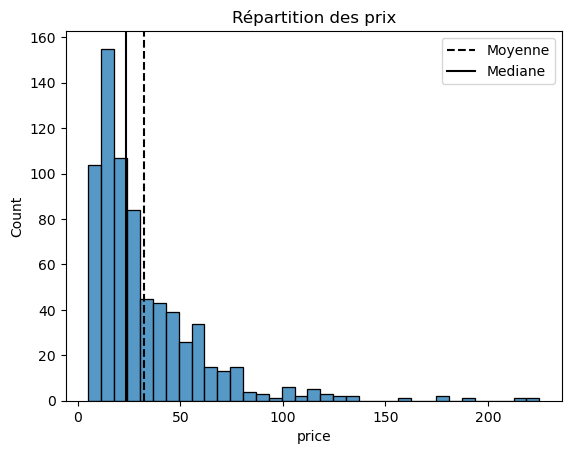

In [156]:
mean = df_final["price"].mean()
median = df_final["price"].median()

#Representation de la repartition des prix en histogramme:
sns.histplot(data=df_final["price"])
plt.axvline(mean, color="black", linestyle="--")
plt.axvline(median, color="black", linestyle="-")
plt.legend({"Moyenne":mean,"Mediane":median})
plt.title("Répartition des prix")

**L'histogramme de la répartition des prix correspond visuellement à ce qui est attendu même min/max, la moyenne et la médiane aussi. On voit que la médiane est décalée sur la gauche de notre graphique, les premiers prix sont donc plus fréquents dans notre boutique que les plus élevés.  La mesure empirique du Skweness est confirmée puisqu'on voit que la répartition est assymétrique en faveur de la droite.**
**Visuellement et sans avoir encore de confirmation tangible il semblerait que les outliers se retrouvent plutôt parmi les prix élevés.**

In [188]:
# Detection numerique des outliers:
Q1 = df_final['price'].quantile(0.25)
Q3 = df_final['price'].quantile(0.75)
IQR = Q3 - Q1
print("Q1=",round(Q1,0), "Q3=",round(Q3,0),"IQR=",round(IQR,0))
Lim_Outliers_Inf = Q1-1.5*IQR
Lim_Outliers_Sup = Q3+1.5*IQR

print("Limite pour les outliers inferieurs:\n", round(Lim_Outliers_Inf,2))

print("Limite pour les outliers superieurs:\n", round(Lim_Outliers_Sup,2))

Q1= 14.0 Q3= 42.0 IQR= 28.0
Limite pour les outliers inferieurs:
 -28.01
Limite pour les outliers superieurs:
 84.29


* La limite inférieure étant négative (-28,01) il est logique qu'aucun outlier inférieur n'existe (un prix ne peut pas être négatif et notre valeur de prix minimale est de 5,20€). On vérifie tout de même en affichant les index pour lesquels l'affirmation serait juste (True).

* La limite supérieure est de 84,29€ sachant que la valeur maximale est de 225€ il est évident qu'il y a au moins un outlieur supérieur, on doit donc retourner les index des tuples pour lesquels l'affirmation est juste. Il y a 32 références concernées.

In [201]:
Outliers_Inf = df_final["price"] < Lim_Outliers_Inf # dtype bool
Outliers_Sup = df_final["price"] > Lim_Outliers_Sup # dtype bool
print("Les index des outliers inferieurs sont:\n", np.where(Outliers_Inf)[0])
print("Les index des outliers superieurs sont:\n", np.where(Outliers_Sup)[0])
print("Donc, Il y a",len(np.where(Outliers_Sup)[0]) ," références concernées")

print("\n",df_final.loc[(df_final["price"]>84.29),("price","post_title")])

Les index des outliers inferieurs sont:
 []
Les index des outliers superieurs sont:
 [  3   5  12  16  37 102 119 152 177 181 186 187 201 232 239 286 315 334
 393 396 405 410 437 464 508 519 541 546 559 572 580 670]
Donc, Il y a 32  références concernées

       price                                         post_title
6     109.6  Château de Meursault Puligny-Montrachet 1er Cr...
10    115.0  Domaine des Comtes Lafon Volnay 1er Cru Santen...
26     86.8  Champagne Agrapart &amp; Fils Minéral Extra Br...
34    100.0  Zind-Humbrecht Riesling Grand Cru Rangen De Th...
76    102.3  Domaine Des Croix Corton Grand Cru Les Grèves ...
199   105.0  Domaine des Comtes Lafon Volnay 1er Cru Santen...
234    99.0  Domaine des Comtes Lafon Volnay 1er Cru Champa...
307    88.4  Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...
364   175.0                Camille Giroud Clos de Vougeot 2016
368   124.8  Domaine Weinbach Gewurztraminer Grand Cru Furs...
377   176.0                               Cognac F

**Les valeurs en dessous de Q1- 1,5 x IQ et au-dessus de Q3 + 1,5 x IQ qui seront considérée comme de outliers. (avec Q1 = premier quantile, IQ = écart interquantile et Q3 = troisième quantile)**

Tracons une représentation graphique de type boîte à moustaches pour finalement identifier les valeurs aberrantes.

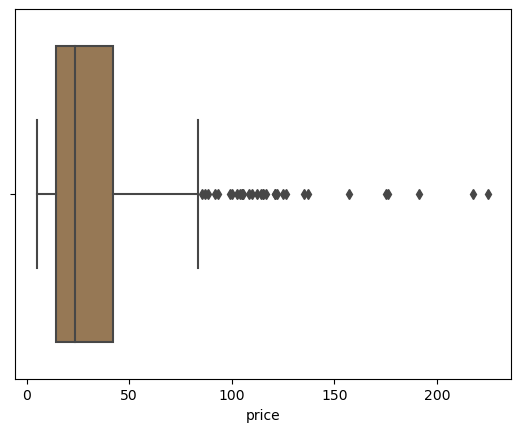

In [245]:
Boxplot = sns.boxplot(x=df_final["price"],palette="cubehelix")

**On retrouve nos Q1, Q3 et la médiane, les 32 outliers au-dessus de Q3 et leur position en fonction de leur prix.**

**Statistiquement parlant, les produits dont les prix déppassent la limite des outliers supérirures (84€) sont considérés des outliers. Cependant, une simple recherche sur internet montre qu'il existe vraiment des produits qui sont beaucoup plus chers. On cite a titre d'exemples ces deux produits dont le prix est cohérent avec le prix du marché :**

In [220]:
print("\n",df_final.loc[(df_final["price"]== 137) | (df_final["price"]==225),("price","post_title")])


       price                                         post_title
677   137.0  Domaine Des Croix Corton Charlemagne Grand Cru...
1436  225.0     Champagne Egly-Ouriet Grand Cru Millésimé 2008
